In [1]:
# データのダウンロード
! wget https://nlp100.github.io/data/ai.ja.zip
! unzip /content/ai.ja.zip
! rm -r /content/ai.ja.zip
# MeCabのインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
# CRF++のソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
FILE_NAME = "crfpp.tar.gz"
! wget 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O $FILE_NAME
! tar xvf crfpp.tar.gz
% cd CRF++-0.58
! ./configure && make && make install && ldconfig
% cd ..
! rm -r /content/crfpp.tar.gz
# CaboChaのソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha-0.69.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha-0.69.tar.bz2
%cd cabocha-0.69
!./configure -with-charset=utf-8 && make && make check && make install && ldconfig
%cd ..
! rm -r /content/cabocha-0.69.tar.bz2

--2022-02-27 10:31:12--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2022-02-27 10:31:12 (23.0 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  /content/ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages w

In [2]:
! cabocha -f1 -o /content/ai.ja.txt.parsed /content/ai.ja.txt
! rm /content/ai.ja.txt

In [3]:
! head -n 5 /content/ai.ja.txt.parsed
# 1行目の* 0 -1D 1/1 0.000000 の部分が係り受け情報
# 3文字目の 0 が文節番号
# その後の -1 が係先を示す -1は係先なしを示す

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS


In [4]:
# ==============
# 40. 係り受け解析結果の読み込み（形態素）
# ==============
import re

# 区切り文字
separator = re.compile('\t|,')

class Morph:
    def __init__(self, morph):
        temp = separator.split(morph)
        self.surface = temp[0] # 表層系（ surface )
        self.base = temp[7]     # 基本形（ base )
        self.pos = temp[1]      # 品詞　（ pos )
        self.pos1 = temp[2]     # 品詞細分類1（ pos1 )

def make_morphlist(fname):
    sentences = []
    morphs = []
    with open(fname, 'r') as f:
        for line in f:
            if line[0] == '*':
                continue
            elif line != 'EOS\n':
                morphs.append(Morph(line))
            elif len(morphs) > 0:
                sentences.append(morphs)
                morphs = []
        return sentences

morph_list = make_morphlist('/content/ai.ja.txt.parsed')

for morph in morph_list[1]:
    print(vars(morph))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

In [5]:
# ==============
# 41. 係り受け解析結果の読み込み（文節・係り受け）
# ==============

# 係り受けかどうかの正規表現
check = re.compile(r'''(?:\*\s\d+\s) # キャプチャ対象外
                            (-?\d+)       # 数字(係り先)
                          ''', re.VERBOSE) 
# re.VERBOSEを渡すことで、空白やコメントを正規表現パターンから除外できる

class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.srcs = []   # 係り元文節インデックス番号のリスト
        self.dst  = dst  # 係り先文節インデックス番号

# 係り元を代入し、Chunkリストを文のリストを追加
def append_sentence(chunks, sentences):
    # 係り元を代入
    for i, chunk in enumerate(chunks):
        if chunk.dst != -1:
            chunks[chunk.dst].srcs.append(i)
    sentences.append(chunks)
    return sentences, []

def make_chunklist(fname):
    morphs = []
    chunks = []
    sentences = []

    with open(fname, 'r') as f:
        
        for line in f:
            checks = check.match(line)

            # EOSまたは係り受け解析結果でない場合
            if not (line == 'EOS\n' or checks):
                morphs.append(Morph(line))
                
            # 係り受け解析結果で、形態素解析結果がある場合
            elif len(morphs) > 0:
                chunks.append(Chunk(morphs, dst))
                morphs = []
        
            # 係り受け結果の場合
            if checks:
                # 係り先を代入
                dst = int(checks.group(1))
            
            # EOSで係り受け結果がある場合
            if line == 'EOS\n' and len(chunks) > 0:
                sentences, chunks = append_sentence(chunks, sentences)
        return sentences

sentences = make_chunklist('/content/ai.ja.txt.parsed')

for i, chunk in enumerate(sentences[1]):
    print('{}: {}, 係り先:{}, 係り元:{}'.format(i, [morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs))


0: ['人工', '知能'], 係り先:17, 係り元:[]
1: ['（', 'じん', 'こうち', 'のう', '、', '、'], 係り先:17, 係り元:[]
2: ['AI'], 係り先:3, 係り元:[]
3: ['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'], 係り先:17, 係り元:[2]
4: ['「', '『', '計算'], 係り先:5, 係り元:[]
5: ['（', '）', '』', 'という'], 係り先:9, 係り元:[4]
6: ['概念', 'と'], 係り先:9, 係り元:[]
7: ['『', 'コンピュータ'], 係り先:8, 係り元:[]
8: ['（', '）', '』', 'という'], 係り先:9, 係り元:[7]
9: ['道具', 'を'], 係り先:10, 係り元:[5, 6, 8]
10: ['用い', 'て'], 係り先:12, 係り元:[9]
11: ['『', '知能', '』', 'を'], 係り先:12, 係り元:[]
12: ['研究', 'する'], 係り先:13, 係り元:[10, 11]
13: ['計算', '機', '科学'], 係り先:14, 係り元:[12]
14: ['（', '）', 'の'], 係り先:15, 係り元:[13]
15: ['一', '分野', '」', 'を'], 係り先:16, 係り元:[14]
16: ['指す'], 係り先:17, 係り元:[15]
17: ['語', '。'], 係り先:34, 係り元:[0, 1, 3, 16]
18: ['「', '言語', 'の'], 係り先:20, 係り元:[]
19: ['理解', 'や'], 係り先:20, 係り元:[]
20: ['推論', '、'], 係り先:21, 係り元:[18, 19]
21: ['問題', '解決', 'など', 'の'], 係り先:22, 係り元:[20]
22: ['知的', '行動', 'を'], 係り先:24, 係り元:[21]
23: ['人間', 'に'], 係り先:24, 係り元:[]
24: ['代わっ', 'て'], 係り先:26, 係り元:[22, 23]
25: ['コンピューター', 'に'], 係り先:26, 係り元:[]
2

In [6]:
# ==============
# 42. 係り元と係り先の文節の表示
# ==============

sentences = make_chunklist('/content/ai.ja.txt.parsed')

for i, sentence in enumerate(sentences):
    print('----', i, '----')
    for j, chunk in enumerate(sentence):
        if chunk.dst != -1:
            src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
            dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[chunk.dst].morphs])
            print('{}:{}\t{}'.format(j, src, dst))
    if i >= 1:
        break

---- 0 ----
---- 1 ----
0:人工知能	語
1:じんこうちのう	語
2:AI	エーアイとは
3:エーアイとは	語
4:計算	という
5:という	道具を
6:概念と	道具を
7:コンピュータ	という
8:という	道具を
9:道具を	用いて
10:用いて	研究する
11:知能を	研究する
12:研究する	計算機科学
13:計算機科学	の
14:の	一分野を
15:一分野を	指す
16:指す	語
17:語	研究分野とも
18:言語の	推論
19:理解や	推論
20:推論	問題解決などの
21:問題解決などの	知的行動を
22:知的行動を	代わって
23:人間に	代わって
24:代わって	行わせる
25:コンピューターに	行わせる
26:行わせる	技術または
27:技術または	研究分野とも
28:計算機	コンピュータによる
29:コンピュータによる	情報処理システムの
30:知的な	情報処理システムの
31:情報処理システムの	実現に関する
32:設計や	実現に関する
33:実現に関する	研究分野とも
34:研究分野とも	される


In [7]:
# ==============
# 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
# ==============

sentences = make_chunklist('/content/ai.ja.txt.parsed')

for sentence in sentences:
    for chunk in sentence:
        if chunk.dst != -1:
            src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
            src_pos = [morph.pos for morph in chunk.morphs]
            dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[chunk.dst].morphs])
            dst_pos = [morph.pos for morph in sentence[chunk.dst].morphs]
            if '名詞' in src_pos and '動詞' in dst_pos:
                print(src, dst, sep='\t')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている
知的能力を	実現する
コンピュータ上で	実現する
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
推論判断を	模倣する
画像データを	解析して
解析して	検出抽出したりする
パターンを	検出抽出したりする
画像認識等が	ある
1956年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
記述を	する
主体と	する
意味あいでも	使われている
思考ルーチンも	呼ばれる
ことも	ある
カウンセラーを	模倣した
プログラム	出されるが
人工無脳が	出されるが
引き合いに	出されるが
計算機に	させようという
役割を	させようという
エキスパートシステムと	呼ばれる
実現は	困難視されている
人間が	持つ
暗黙に	持つ
記述が	なり
問題と	なり
利用が	困難視されている
困難視されている	ある
アプローチとしては	知られているが
アプローチも	知られているが
差は	ある
記号的明示性に	ある
その後	集めた
サポートベクターマシンが	集めた
注目を	集めた
経験を	行う
元に	行う
学習を	行う
手法も	ある
宇宙において	実装するという
言葉通り	実装するという
知性を	表現し
機械的に	表現し
表現し	実装するという
登場により	行った
流行を	超えて
社会に	浸透して
浸透して	行った
2017年にかけて	導入した
ディープラーニングを	導入した
プレイヤーも	破り
麻雀では	なった
MicrosoftSuphx(SuperPhoenix)」が	到達するなど
AIとして	到達するなど
十段に	到達するなど
到達するなど	なった
最先端技術と	なった
人工知能は	呼ばれ
機械学習と	呼ばれ
ものが	ある
学習を	繰り返す
ことを	している
基本と	している
システム	関係している
経験に	基づく
手法であり	関係している
ソフトコンピューティングと	関係している
関係している	ある
手法としては	ある
ものが	ある
これらを	統合した
知的システムを	

In [8]:
# 日本語表示用フォントのインストール
! apt install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,791 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155498 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-g

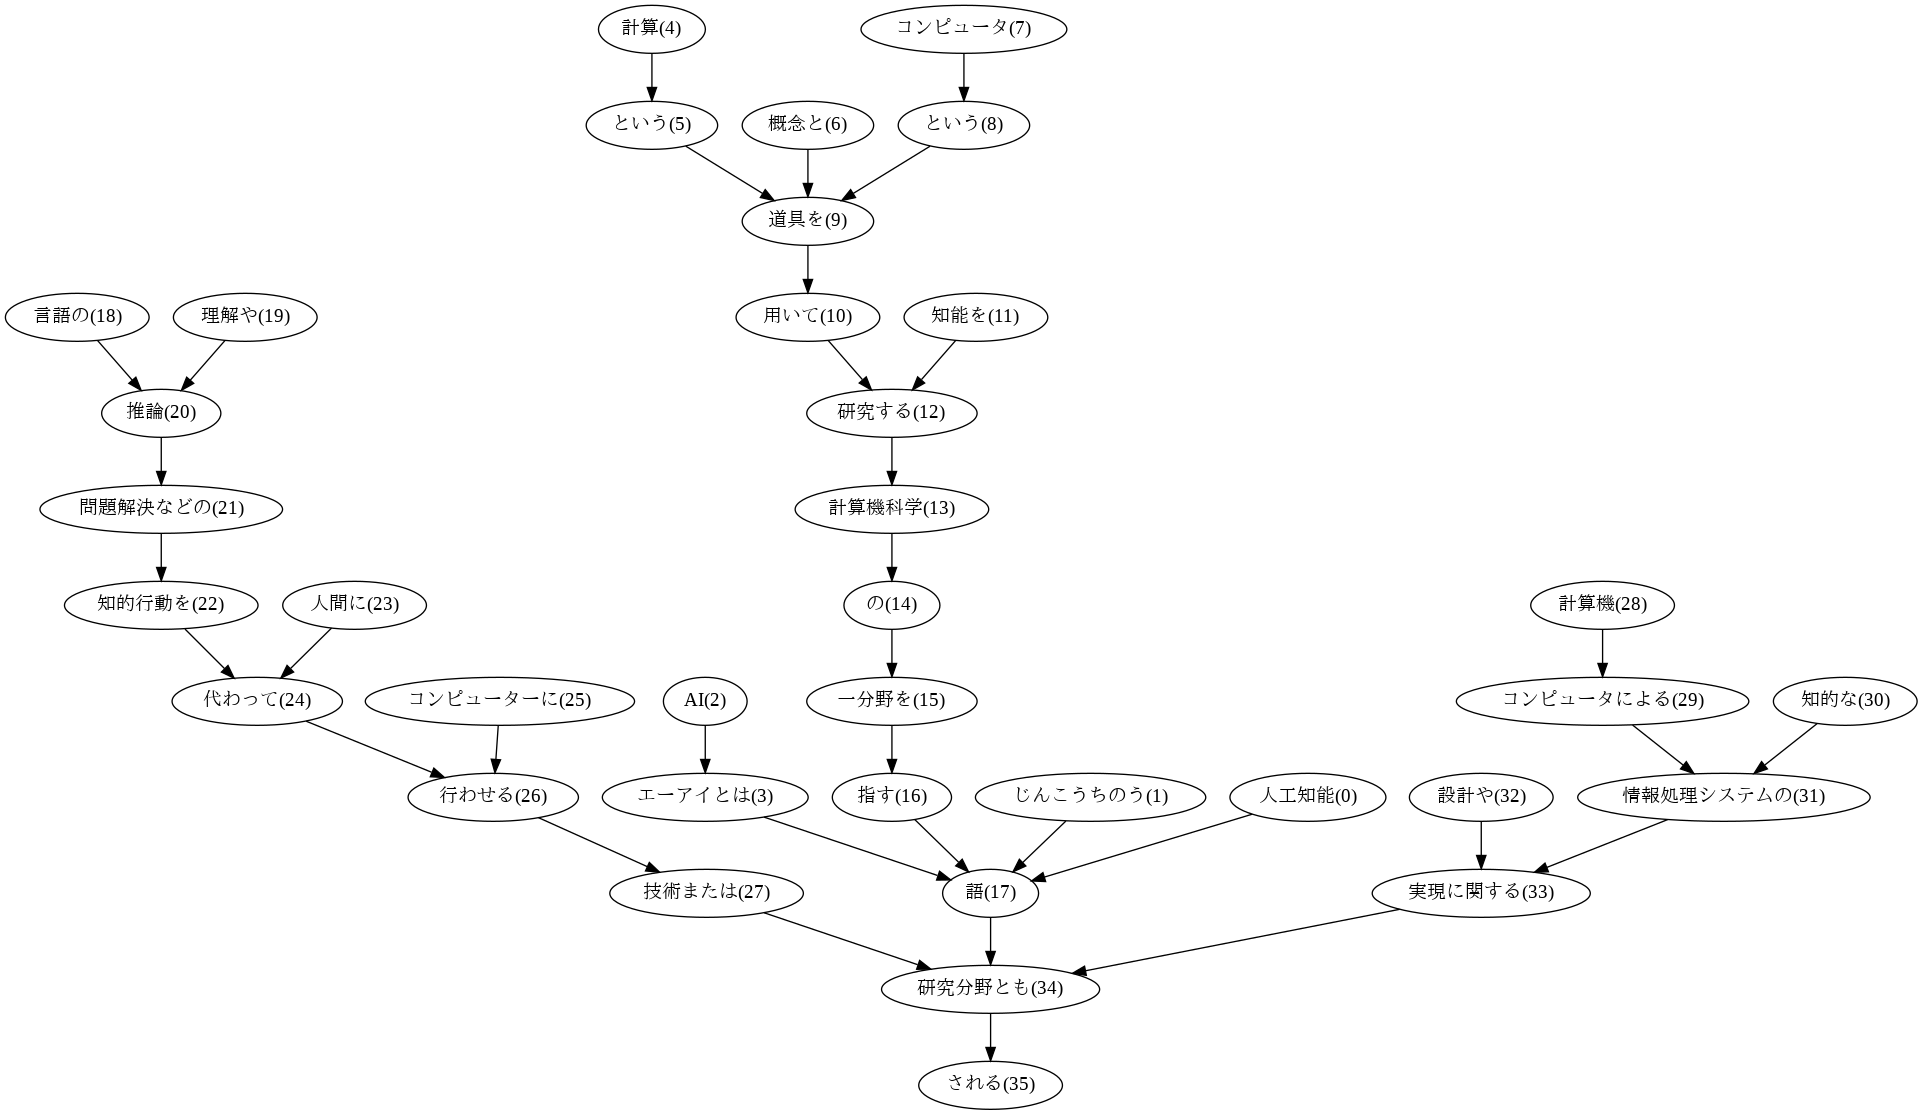

In [9]:
# ==============
# 44. 係り受け木の可視化
# ==============
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

sentences = make_chunklist('/content/ai.ja.txt.parsed')
sentence = sentences[1]
edges = []
for id, chunk in enumerate(sentence):
    if chunk.dst != -1:
        src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
        dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[chunk.dst].morphs] + ['(' + str(chunk.dst) + ')'])
        edges.append([src, dst])
n = pydot.Node('node')
n.fontname = 'IPAGothic'
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)
g.write_png('/content/result44.png')
display_png(Image('/content/result44.png'))

In [10]:
with open('/content/example45.txt', 'w') as f:
    print('ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。', file=f)

! cabocha -f1 -o /content/example45.txt.parsed /content/example45.txt
! rm /content/example45.txt

In [11]:
# ==============
# 45. 動詞の各パターンの抽出
# ==============

# sentences = make_chunklist('/content/example45.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

with open('/content/result45.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == '動詞':  # 左から順番に動詞を探す
                    particle_list = []   # 助詞のリスト
                    for src in chunk.srcs:  # 動詞があった場合には係元から助詞を探す
                        particle_list = particle_list + [morph.surface for morph in sentence[src].morphs if morph.pos == '助詞']
                    if len(particle_list) > 0:  # 助詞があった場合は辞書順にソート(setを用いて重複を削除)
                        particle_list = sorted(set(particle_list))
                        line = '{}\t{}'.format(morph.base, ' '.join(particle_list))
                        print(line, file=f)
                    break 

In [13]:
# コーパス中で頻出する述語と格パターンの組み合わせの確認
print("------------------------------------------")
! cat /content/result45.txt | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# 「行う」と格パターンの組み合わせの確認
! cat /content/result45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# 「なる」と格パターンの組み合わせの確認
! cat /content/result45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# 「与える」と格パターンの組み合わせの確認
! cat /content/result45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")

------------------------------------------
    136 する	を
    100 する	て を
     44 する	て で は
     15 ある	が て に は
      9 行う	を
------------------------------------------
      9 行う	を
      5 行う	て に
      4 行う	て に を
      1 行う	まで を
      1 行う	から
------------------------------------------
      8 なる	が と
      6 なる	に
      5 なる	が て と
      1 異なる	が で
      1 異なる	も
------------------------------------------
      1 与える	が など に
      1 与える	に は を
      1 与える	が に
------------------------------------------


In [15]:
# ==============
# 46. 動詞の格フレーム情報の抽出
# ==============

# sentences = make_chunklist('/content/example45.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

with open('/content/result46.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == '動詞':  # 左から順番に動詞を探す
                    particle_list = []   # 助詞のリスト
                    chunk_list = []      # 文節のリスト
                    for src in chunk.srcs:  # 動詞があった場合には係元から助詞を探す
                        particle = [morph.surface for morph in sentence[src].morphs if morph.pos == '助詞']
                        if len(particle) > 0:
                            particle_list = particle_list + particle
                            chunk_list.append(''.join(morph.surface for morph in sentence[src].morphs if morph.pos != '記号'))
                    if len(particle_list) > 0:  # 助詞があった場合は辞書順にソート(setを用いて重複を削除)
                        particle_list = sorted(set(particle_list))
                        chunk_list = sorted(chunk_list, key=lambda x : x[-1])
                        line = '{}\t{}\t{}'.format(morph.base, ' '.join(particle_list), ' '.join(chunk_list))
                        print(line, file=f)
                    break 

In [16]:
# 確認
! head -n 5 /content/result46.txt

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに


In [17]:
with open('/content/example47.txt', 'w') as f:
    print('また、自らの経験を元に学習を行う強化学習という手法もある。', file=f)

! cabocha -f1 -o /content/example47.txt.parsed /content/example47.txt
! rm /content/example47.txt

In [18]:
# ==============
# 47. 機能動詞構文のマイニング
# ==============

# sentences = make_chunklist('/content/example47.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

with open('/content/result47.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == '動詞': # 左から順番に動詞を探す
                    for i, src in enumerate(chunk.srcs):
                        if len(sentence[src].morphs) == 2 and sentence[src].morphs[0].pos1 == 'サ変接続' and sentence[src].morphs[1].surface == 'を':
                            predicate = ''.join([sentence[src].morphs[0].surface, sentence[src].morphs[1].surface, morph.base])
                            particle = []       # 助詞
                            particle_list = []  # 助詞のリスト
                            chunk_list = []     # 文節のリスト
                            for src_r in chunk.srcs[:i] + chunk.srcs[i + 1:]:   # 残りの係元から助詞を探す
                                for morph in sentence[src_r].morphs:
                                    if morph.pos == '助詞':
                                        particle.append(morph.surface)
                                if len(particle) > 0:
                                    particle_list = particle_list + particle
                                    chunk_list.append(' '.join(morph.surface for morph in sentence[src_r].morphs if morph.pos != '記号'))
                            if len(particle_list) > 0:
                                particle_list = sorted(set(particle_list))
                                chunk_list = sorted(chunk_list, key=lambda x : x[-1])
                                line = '{}\t{}\t{}'.format(predicate, ' '.join(particle_list), ' '.join(chunk_list))
                                print(line, file=f)
                            break

In [19]:
# コーパス中で頻出する述語（サ変接続名詞+を+動詞）の確認
print("------------------------------------------")
! cat /content/result47.txt | cut -f 1 | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# コーパス中で頻出する述語と助詞パターン
!cat /content/result47.txt | cut -f 1,2 | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")

------------------------------------------
      3 注目を集める
      2 運転をする
      2 話をする
      2 研究をいる
      2 特許をする
------------------------------------------
      2 話をする	は
      2 特許をする	が に まで
      2 注目を集める	が
      1 開発を行う	は
      1 運転をする	て に
------------------------------------------


In [20]:
with open('/content/example48.txt', 'w') as f:
    print('ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。', file=f)

! cabocha -f1 -o /content/example48.txt.parsed /content/example48.txt
! rm /content/example48.txt

In [22]:
# ==============
# 48. 名詞から根へのパスの抽出
# ==============

# sentences = make_chunklist('/content/example48.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

for sentence in sentences:
    for chunk in sentence:
        if '名詞' in [morph.pos for morph in chunk.morphs]:
            path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')]
            while chunk.dst != -1:
                path.append(''.join(morph.surface for morph in sentence[chunk.dst].morphs if morph.pos != '記号'))
                chunk = sentence[chunk.dst]
            print(' -> '.join(path))

人工知能
人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または 

In [38]:
# ==============
# 49. 名詞間の係り受けパスの抽出
# ==============

# sentences = make_chunklist('/content/example48.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

from itertools import combinations
import re

for count, sentence in enumerate(sentences):
    nouns = []
    for i, chunk in enumerate(sentence):
        if '名詞' in [morph.pos for morph in chunk.morphs]: 
            nouns.append(i)
    for i, j in combinations(nouns, 2): 
        path_i = []
        path_j = []
        while i != j:
            if i < j:
                path_i.append(i)
                i = sentence[i].dst
            else:
                path_j.append(j)
                j = sentence[j].dst
        if len(path_j) == 0:
            chunk_X = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'X' for morph in sentence[path_i[0]].morphs])
            chunk_Y = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'Y' for morph in sentence[i].morphs])
            chunk_X = re.sub('X+', 'X', chunk_X)
            chunk_Y = re.sub('Y+', 'Y', chunk_Y)
            path_XtoY = [chunk_X] + [''.join([morph.surface for morph in sentence[n].morphs if morph.pos != '記号']) for n in path_i[1:]] + [chunk_Y]
            print(' -> '.join(path_XtoY))
        else: 
            chunk_X = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'X' for morph in sentence[path_i[0]].morphs])
            chunk_Y = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'Y' for morph in sentence[path_j[0]].morphs])
            chunk_k = ''.join([morph.surface for morph in sentence[i].morphs if morph.pos != '記号'])
            chunk_X = re.sub('X+', 'X', chunk_X)
            chunk_Y = re.sub('Y+', 'Y', chunk_Y)
            path_X = [chunk_X] + [''.join([morph.surface for morph in sentence[n].morphs if morph.pos != '記号']) for n in path_i[1:]]
            path_Y = [chunk_Y] + [''.join([morph.surface for morph in sentence[n].morphs if morph.pos != '記号']) for n in path_j[1:]]
            print(' | '.join([' -> '.join(path_X), ' -> '.join(path_Y), chunk_k]))
    if count > 1:
        break

X | YのうY | 語
X | Y -> エーアイとは | 語
X | YとはY | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yする -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> の -> 一分野を -> 指す | 語
X | Yを -> 指す | 語
X -> Y
X -> 語 | Yの -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yや -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Y -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yを -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 行わせる -> 技術または | 研究分野とも
X -> 語 | YまたはY | 研究分野とも
X -> 語 | Y -> コンピュータによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yな -> 情報処理システムの -> 実現に関する | 研究分野とも